## top , WR * reco

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#from PhysicsTools.NanoAODTools.postprocessing.tools import *
#from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module
#from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection,Object
#from PhysicsTools.NanoAODTools.postprocessing.framework.postprocessor import PostProcessor
#from PhysicsTools.NanoAODTools.postprocessing.analyser.ID.GenStatus import *
#from PhysicsTools.NanoAODTools.postprocessing.analyser.AnalyserHelper.AnalyserHelper import *
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



## x 방향이 이벤트 y 방향이 각 입자의 정보 z 방향이 입자들 각각이라 생각하면 될듯?
# 각 층(이벤트)에 입자들이 쭉 있고 거기에 정보가 있다고 생각하면 될듯?

## 일단 보고 싶은 키워드나 주제를 고르면 그게 이벤트 별로 있으면 다 뽑아옴 . 이제 거기서 필터로 걸러내면 모든 이벤트는 해당이 안되고 특정 이벤트만 남으면 거기 안에 들어있는 값 쓰면 됨

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()


pdgid = events["GenPart_pdgId"].array()
mass = events["GenPart_mass"].array()
pt = events["GenPart_pt"].array()
phi = events["GenPart_phi"].array()
eta = events["GenPart_eta"].array()



wmask =(((pdgid == 24) | (pdgid == -24)) & (mass < 100))
bmask = ((pdgid == 5) | (pdgid == -5) )
wmass = mass[wmask]
bmass = mass[bmask]
wpt = pt[wmask]
bpt = pt[bmask]
wphi = phi[wmask]
bphi = phi[bmask]
weta = eta[wmask]
beta = eta[bmask]
# 두 개 이상의 b quark, 하나이상의 W onshell boson만 있는 이벤트만 필터링
valid_events = (ak.num(bpt) >= 2) & (ak.num(wpt) >= 1)

# apply mask
bpt = bpt[valid_events]
bphi = bphi[valid_events]
beta = beta[valid_events]
bmass = bmass[valid_events]
wpt = wpt[valid_events]
wphi = wphi[valid_events]
weta = weta[valid_events]
wmass = wmass[valid_events]


# 벡터 구성
b1 = vector.array({
    "pt": bpt[:, 0],
    "phi": bphi[:, 0],
    "eta": beta[:, 0],
    "mass": bmass[:, 0]
})

b2 = vector.array({
    "pt": bpt[:, 1],
    "phi": bphi[:, 1],
    "eta": beta[:, 1],
    "mass": bmass[:, 1]
})

w1 = vector.array({
    "pt": wpt[:, 0],
    "phi": wphi[:, 0],
    "eta": weta[:, 0],
    "mass": wmass[:, 0]
})

top =  b2 + w1
#print("Top mass (reco from gen parts):", (top.mass), "GeV")
# 히스토그램 그리기
plt.hist(top.mass, bins=100, range=(160, 200), alpha=1.0, label='Top Mass')
wvirtual = b1 + b2 + w1
plt.hist(wvirtual.mass, bins=200, range=(0, 8000), alpha=0.7, label='W Virtual Mass')

#top 갯수
print("Number of top quarks:", len(top.mass))
# wvirtual 갯수
print("Number of W virtual particles:", len(wvirtual.mass))




## Gen jet delta r

1840


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  4.,  4.,  5.,
         6.,  7.,  6.,  4., 11., 12.,  9., 14., 15., 14.,  8., 11., 21.,
        15., 19., 31., 61., 43., 66., 31., 24.,  9., 11.,  5., 10.,  4.,
         3.,  3.,  1.,  3.,  3.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ,  0.60000002,  0.69999999,  0.80000001,  0.89999998,
         1.        ,  1.10000002,  1.20000005,  1.29999995,  1.39999998,
         1.5       ,  1.60000002,  1.70000005,  1.79999995,  1.89999998,
         2.        ,  2.0999999 ,  2.20000005,  2.29999995,  2.4000001 ,
         2.5       ,  2.5999999 ,  2.70000005,  2.79999995,  2.900000

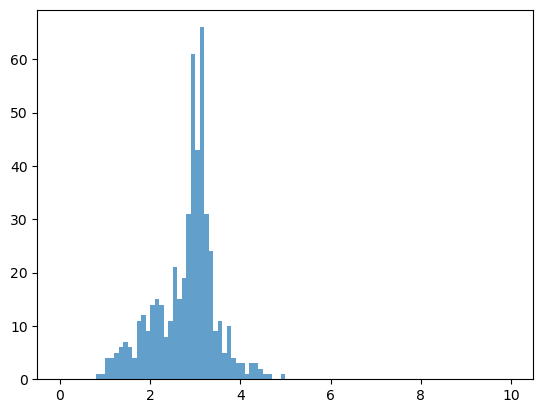

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()

ak8jetmass = events["GenJetAK8_mass"].array()
ak8flavor = events["GenJetAK8_partonFlavour"].array()
ak8eta = events["GenJetAK8_eta"].array()
ak8phi = events["GenJetAK8_phi"].array()
bmask = (ak8flavor == 5) 
notbmask = (ak8flavor != 5)

ak8jetmass_b = ak8jetmass[bmask]
ak8jetmass_notb = ak8jetmass[notbmask]
import matplotlib.pyplot as plt

# 1차원 배열로 flatten (awkward → numpy 변환)
aa = ak.to_numpy(ak.flatten(ak8jetmass_b))
nb = ak.to_numpy(ak.flatten(ak8jetmass_notb))
'''
plt.hist(aa, bins=100, range=(0, 500), alpha=0.9, label="b-quark jets")
plt.hist(nb, bins=100, range=(0, 500), alpha=0.5, label="non-b jets")
plt.xlabel("Jet Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.show()
'''
# 조건: GenJetAK8가 2개 이상인 이벤트만
valid = ak.num(ak8jetmass) >= 2
ak8mass = ak8jetmass[valid]
eta = ak8eta[valid]
phi = ak8phi[valid]

# 내림차순 정렬된 인덱스
sorted_idx = ak.argsort(ak8mass, axis=1, ascending=False)

# 인덱스로 정렬된 jet들 얻기
sorted_eta = eta[sorted_idx]
sorted_phi = phi[sorted_idx]

# 가장 큰 두 jet의 eta, phi
eta1 = ak.firsts(sorted_eta)          # leading
eta2 = ak.firsts(ak.drop_none(sorted_eta[:, 1:]))  # subleading

phi1 = ak.firsts(sorted_phi)
phi2 = ak.firsts(ak.drop_none(sorted_phi[:, 1:]))

# ΔR 계산
delta_eta = eta1 - eta2
delta_phi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
delta_r = np.sqrt(delta_eta**2 + delta_phi**2)

plt.hist(delta_r, bins=100, range=(0, 10), alpha=0.7, label='ΔR between leading jets')


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()

pdgid = events["GenPart_pdgId"].array()

print("pdgid:", pdgid[0])



1840
pdgid: [2, -1, 34, 34, 9900014, -13, -13, 9900014, -13, 22, 22, 34, 13, 13, 22, 34, 6, -5, 6, 24, 5, 4, -3, 21, 3, -3, 4, 21, -3, 423, 2, 21, 21, 21, 21, 21, -2, 21, 21, 1, 21, 21, 21, -5, 111, 111, 523, 21, 21, 5, -1, -521, 111, 111, 111, 111, 421, 111, 11, -11, 22, 22, 22, 521, 423, 22, 22, 22, 22, 22, 22, 22, 22, 111, 111, 111, 111, -433, 111, 421, 22, 22, 22, 22, 22, 22, 22, 22, 22, -431, 22, 22, 13, -14, 331, 111, 22, 22, 22]
